# Chapter 4: Training Models Notes

## 1. Implementations of Linear Regression

### 1.1 The Normal Equation

- Recall: $\hat{\beta} = (X^T X)^{-1} X^T y$ and $\hat{y} = X \hat{\beta}$
- First, do some OG OLS `python` style

In [34]:
# Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt



# Generate fake linear-ish data
np.random.seed(42)
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

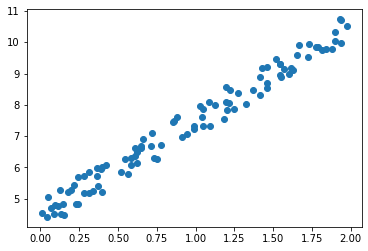

In [35]:
# Plot
plt.figure()
plt.plot(X, y, 'o')
plt.show()

In [36]:
# Do the manual matrix algebra
X_b = np.c_[np.ones((100, 1)), X] # add the intercept
beta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
beta_hat

array([[4.51359766],
       [2.98323418]])

In [37]:
y_hat = X_b.dot(beta_hat)

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_hat, y)

0.08495655256593736

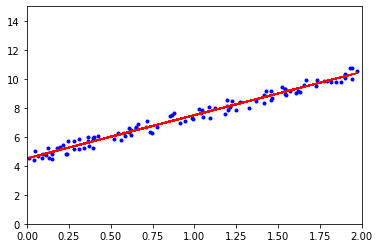

In [39]:
plt.figure()
plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r-')
plt.axis([0, 2, 0, 15])
plt.show()

In [40]:
# Prediciton for some new data

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(beta_hat)
y_pred

array([[ 4.51359766],
       [10.48006601]])

### 1.2 Sklearn Version

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [42]:
lin_reg.predict(X_new) # perfect match

array([[ 4.51359766],
       [10.48006601]])

In [43]:
# sklearn just implements the SVD implementation from scipy

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [44]:
# Can also compute the pseudoinverse using numpy

np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

### 1.3 Gradient Descent

#### 1.3.1 Batch gradient descent

- GD on the whole dataset
$$\nabla_\theta \mathrm{MSE}(\theta) = \frac{2}{m} X^T (X \theta - y)$$
$$\theta^{\mathrm{next}} = \theta - \eta \nabla_\theta \mathrm{MSE}(\theta)$$

In [45]:
# Implementation

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random init

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [46]:
theta

array([[4.51359766],
       [2.98323418]])

In [47]:
# Obviously, convergence is modulated by the learning rate and the number of iterations
# Plot the convergence for different rates

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)

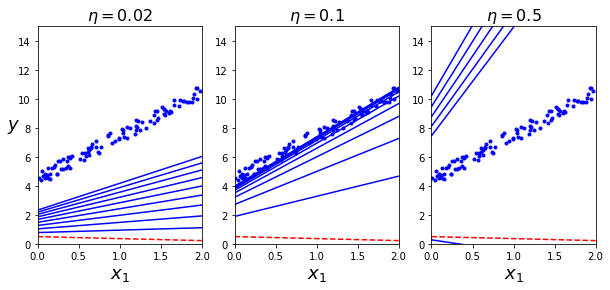

In [48]:
np.random.seed(42)

theta = np.random.randn(2, 1)

plt.figure(figsize = (10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()